In [1]:
import os
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# C:\Users\aamos\Documents\Education\Netology\Python\!_Final_work

##### Загрузите файл HR.csv в pandas dataframe

In [2]:
df_hr = pd.read_csv('C:\\Users\\aamos\\Documents\\Education\\Netology\\Python\\!_Final_work\\HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Признаки:
 1. satisfaction_level - Уровень удовлетворенности работой
 2. Last_evaluation - Время с момента последней оценки в годах
 3. number_projects - Количество проектов, выполненных за время работы
 4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
 5. time_spend_company - Стаж работы в компании в годах
 6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
 7. left - уволился ли сотрудник
 8. promotion_last_5years - повышался ли сотрудник за последние пять лет
 9. department - отдел в котором работает сотрудник
 10. salary - относительный уровень зарплаты

##### Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
print('Значение моды показателя "Уровень удовлетворенности работой" ', df_hr.satisfaction_level.mode()[0])
print('Значение моды показателя "Время с момента последней оценки в годах" ', df_hr.last_evaluation.mode()[0])
print('Значение моды показателя "Количество проектов, выполненных за время работы" ', df_hr.number_project.mode()[0])
print('Значение моды показателя "Среднее количество часов на рабочем месте в месяц" ', df_hr.average_montly_hours.mode()[0])
print('Значение моды показателя "Стаж работы в компании в годах" ', df_hr.time_spend_company.mode()[0])

Значение моды показателя "Уровень удовлетворенности работой"  0.1
Значение моды показателя "Время с момента последней оценки в годах"  0.55
Значение моды показателя "Количество проектов, выполненных за время работы"  4
Значение моды показателя "Среднее количество часов на рабочем месте в месяц"  135
Значение моды показателя "Стаж работы в компании в годах"  3


In [5]:
df_hr.department.unique(), df_hr.salary.unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

##### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

1. К количественным переменным отностим:
 - Уровень удовлетворенности работой;
 - Время с момента последней оценки в годах;
 - Количество проектов, выполненных за время работы;
 - Среднее количество часов на рабочем месте в месяц;
 - Стаж работы в компании в годах.
 
 показатели "Происходили ли несчастные случаи на рабочем месте с сотрудником", "уволился ли сотрудник", "повышался ли сотрудник за последние пять лет" по сути являются логическими (хотя в данных указаны, как числовые. тип int64)


In [6]:
df_hr_qvar = df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]

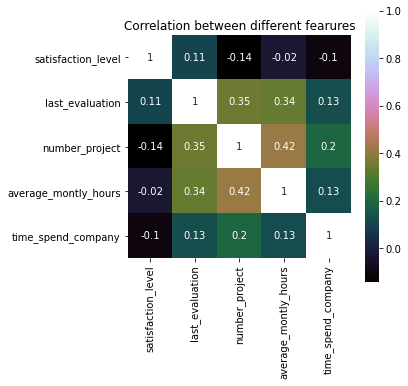

In [7]:
correlation = df_hr_qvar.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plt.show()

Корреляция, определенная по методу Пирсона показывает, что:
 - две наиболее скоррелированных переменных - это "Среднемесячное количество рабочих часов ("average_montly_hours")" и количество проектов ("number_project")
 - наименее скоррелированные переменные - это ""Среднемесячное количество рабочих часов ("average_montly_hours")" и "Уровень удовлетворенности ("satisfaction_level")"

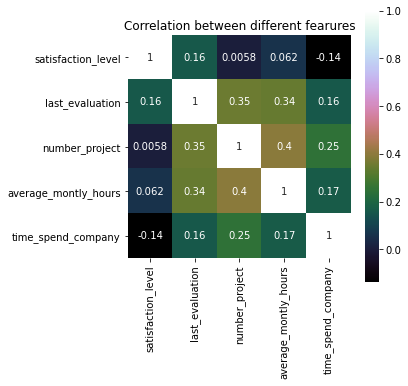

In [40]:
# method{‘pearson’, ‘kendall’, ‘spearman’} or callable
correlation_spearman = df_hr_qvar.corr(method = 'spearman')
plt.figure(figsize=(5,5))
sns.heatmap(correlation_spearman, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plt.show()

Корреляция, определенная по методу Спирмена показывает, что:

 - также, как и по методу Пирсона, две наиболее скоррелированных переменных - это "Среднемесячное количество рабочих часов ("average_montly_hours")" и количество проектов ("number_project");
 - а две наименее скоррелированные переменные - это "количество проектов ("number_project")" и "Уровень удовлетворенности ("satisfaction_level")"

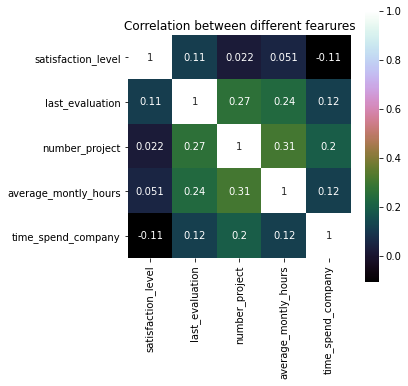

In [41]:
correlation_kendall = df_hr_qvar.corr(method = 'kendall')
plt.figure(figsize=(5,5))
sns.heatmap(correlation_kendall, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plt.show()

Корреляция, определенная по методу Кендалла показывает, также, как и корреляция по методу Спирмена, что:

- две наиболее скоррелированных переменных - это "Среднемесячное количество рабочих часов ("average_montly_hours")" и количество проектов ("number_project");
- две наименее скоррелированные переменные - это "количество проектов ("number_project")" и "Уровень удовлетворенности ("satisfaction_level")"

#### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
df_hr_remain = df_hr.query('left == 0')
number_of_staff_dept = dict()

for dept in list(df_hr_remain.department.unique()):
    num = len(df_hr_remain.query(f'department == {[dept]}'))
    number_of_staff_dept[dept] = num

In [11]:
df_number_of_staff = pd.DataFrame(list(number_of_staff_dept.items()), columns=['department', 'number_of_staff']) 
df_number_of_staff

,department,number_of_staff
0,sales,3126
1,accounting,563
2,hr,524
3,technical,2023
4,support,1674
5,management,539
6,IT,954
7,product_mng,704
8,RandD,666
9,marketing,655


#### Показать распределение сотрудников по зарплатам.

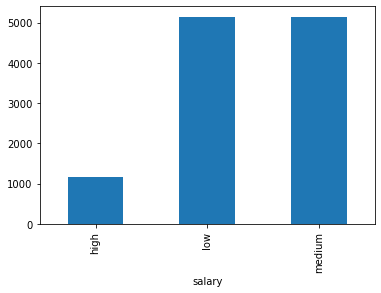

In [80]:
df_hr_salary = df_hr.query('left != 1')
df_hr_salary_all = df_hr_salary[['department','salary']].groupby('salary').count()
df_hr_salary_all.plot.bar()
plt.legend().set_visible(False)

In [14]:
df_hr_salary['num_staff'] = 1


<ipython-input-14-d06a5387676a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_salary['num_staff'] = 1


#### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [15]:
pv_t_salary = pd.pivot_table(df_hr_salary, values='num_staff', index=['department'], columns=['salary'], aggfunc=np.sum)

pv_t_salary = pv_t_salary[['low','medium','high']]
pv_t_salary

salary,low,medium,high
department,,,
IT,437,438,79
RandD,309,310,47
accounting,259,235,69
hr,243,242,39
management,121,194,224
marketing,276,308,71
product_mng,346,296,62
sales,1402,1469,255
support,757,784,133


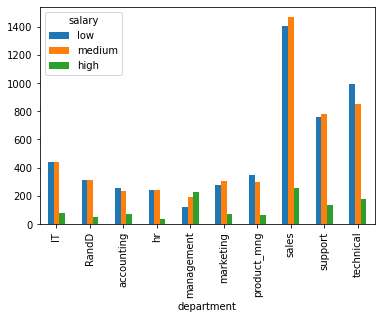

In [16]:
pv_t_salary.plot.bar()

Распределение сотрудников по зарплатам, по количеству сотрудников в каждом департаменте

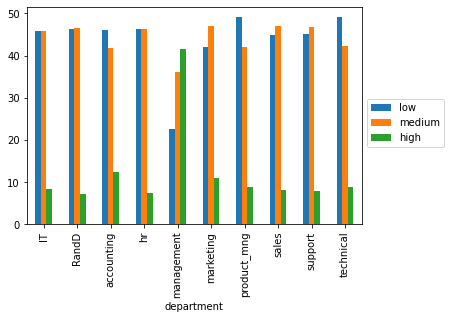

In [17]:
pv_t_salary_2 = pv_t_salary.div(pv_t_salary.sum(axis=1), axis=0)*100   #divide each cell by the sum of the row, multiply by 100
pv_t_salary_2.plot.bar().legend(bbox_to_anchor=(1, 0.6))

Распределение сотрудников по зарплате по структуре (количество сотрудников в каждом департаменте приведено к 100%)

#### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

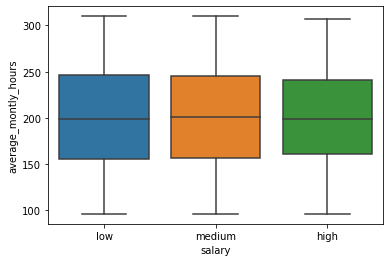

In [47]:
df_time_work = df_hr[['salary', 'average_montly_hours']]

sns.boxplot(x="salary", y="average_montly_hours", 
            data=df_time_work)

Выбросов в данных нет. Поэтому среднее арифмитическое можно считать корректным показателем.

In [51]:
df_av_work_time = df_hr[['salary', 'average_montly_hours']].groupby('salary').mean()
df_av_work_time

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Гипотеза не подтверждается.
Работники с высоким окладом проводят меньше времени (199,87 часов) на работе, чем сотрудники с низким окладом (200,99 часов)

In [82]:
df_av_work_time_1 = df_hr[['salary', 'average_montly_hours']].groupby('salary').median()
df_av_work_time_1

,average_montly_hours
salary,
high,199
low,199
medium,201


Гипотеза также не подтверждается и при расчете среднего времени проводимого на работе, как медианы.

#### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [14]:
df_hr_left = df_hr.query('left == 1')
df_hr_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [19]:
df_hr_left['promotion_last_5years'].sum(), df_hr_left['promotion_last_5years'].sum() / df_hr_left['promotion_last_5years'].count()

(19, 0.005320638476617194)

Для уволившихся сотрудников:
 - Доля сотрудников с повышением за последние 5 лет - 0,53% (19 чел из 3 571 чел)
 - Средняя степень удовлетворенности:
         средняя арифмитическая - 0,44
         медиана - 0,41
 - Среднее количество проектов 
         средняя арифмитическая - 3,85
         медиана - 4,0

In [18]:
df_hr_remain = df_hr.query('left == 0')
df_hr_remain.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [20]:
df_hr_remain['promotion_last_5years'].sum(), df_hr_remain['promotion_last_5years'].sum() / df_hr_remain['promotion_last_5years'].count()

(300, 0.026251312565628283)

Для НЕ уволившихся сотрудников:
 - Доля сотрудников с повышением за последние 5 лет - 2,63% (300 чел из 11 428 чел)
 - Средняя степень удовлетворенности:
          средняя арифмитическая - 0,67
          медиана - 0,69
 - Среднее количество проектов
          средняя арифмитическая - 3,79
          медиана - 4,0

#### Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
Оценить качество модели на тестовой выборки

In [19]:
df_for_lda = df_hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [31]:
data_status = df_hr['left'] 

In [32]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_for_lda, data_status, test_size=0.25)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [34]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [36]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, lda.predict(X_test))

0.7536